In [40]:
import re
import networkx as nx
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random
import itertools
import scipy

# Reading the Facebook Graph

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


(0.0, 1.0, 0.0, 1.0)

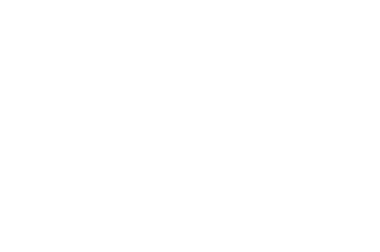

In [4]:
g = nx.read_edgelist('facebook_combined.txt', create_using=nx.Graph(), nodetype=int)
print(nx.info(g))
sp=nx.spring_layout(g)
plt.axis('off')

# Processing the embeddings from Node2Vec

In [5]:
all_values = pd.read_csv('facebook.emd')['4039 128'].values
fb_dict = {'node_id': [], 'embedding': []}

for v in all_values:
    v_split = [float(x) for x in v.split(' ')]
    fb_dict['embedding'] += [v_split[1:]]
    fb_dict['node_id'] += [int(v_split[0])]

fb_df = pd.DataFrame.from_dict(fb_dict)

In [6]:
fb_df.head()

,node_id,embedding
0,3437,"[-0.03462, 0.14721, 0.085802, -0.023518, -0.28..."
1,107,"[0.278259, 0.203138, 0.176665, 0.045982, -0.14..."
2,1684,"[0.357548, -0.144361, 0.40464, 0.335708, -0.14..."
3,0,"[-0.089028, -0.028927, -0.02356, -0.340999, 0...."
4,1912,"[-0.173345, 0.266669, 0.301875, -0.135857, -0...."


# Bridges

In [27]:
bridges = list(nx.bridges(g))
bridges

[(0, 11),
 (0, 12),
 (0, 15),
 (0, 18),
 (0, 37),
 (0, 43),
 (0, 74),
 (0, 114),
 (0, 209),
 (0, 210),
 (0, 215),
 (0, 287),
 (0, 292),
 (0, 335),
 (107, 911),
 (107, 918),
 (107, 1096),
 (107, 1119),
 (107, 1145),
 (107, 1206),
 (107, 1386),
 (107, 1466),
 (107, 1560),
 (107, 1581),
 (107, 1834),
 (348, 358),
 (348, 447),
 (348, 550),
 (414, 585),
 (414, 602),
 (414, 607),
 (414, 608),
 (414, 613),
 (414, 624),
 (414, 638),
 (414, 668),
 (414, 674),
 (1684, 2842),
 (1684, 3031),
 (1684, 3071),
 (1684, 3183),
 (1684, 3230),
 (1912, 2079),
 (1912, 2195),
 (1912, 2269),
 (1912, 2457),
 (1912, 2470),
 (1912, 2569),
 (1912, 2596),
 (3437, 3451),
 (3437, 3453),
 (3437, 3570),
 (3437, 3650),
 (3437, 3709),
 (3437, 3729),
 (3437, 3748),
 (3437, 3798),
 (3437, 3820),
 (3437, 3853),
 (3437, 3856),
 (3437, 3935),
 (3437, 3974),
 (3980, 3984),
 (3980, 4008),
 (3980, 4010),
 (3980, 4015),
 (3980, 4022),
 (3980, 4024),
 (3980, 4035),
 (686, 692),
 (686, 801),
 (698, 875),
 (698, 883),
 (698, 891),


In [25]:
fb_df['embedding']

0       [-0.03462, 0.14721, 0.085802, -0.023518, -0.28...
1       [0.278259, 0.203138, 0.176665, 0.045982, -0.14...
2       [0.357548, -0.144361, 0.40464, 0.335708, -0.14...
3       [-0.089028, -0.028927, -0.02356, -0.340999, 0....
4       [-0.173345, 0.266669, 0.301875, -0.135857, -0....
5       [-0.079471, 0.886898, 0.178264, -0.23032, 0.19...
6       [-0.580206, 0.597084, 0.520536, 0.252478, -0.5...
7       [0.043669, 0.020229, 0.176846, -0.087159, -0.1...
8       [-0.061773, 0.103897, 0.123754, -0.049167, -0....
9       [-0.263634, -0.046728, 0.446156, 0.155358, 0.0...
10      [-0.193311, 0.261345, 0.091177, -0.082558, -0....
11      [0.013326, 0.214931, 0.315772, -0.373133, -0.0...
12      [0.031476, 0.202272, 0.293216, -0.281254, -0.1...
13      [0.060074, 0.18762, 0.283264, -0.410177, -0.17...
14      [-0.133361, 0.238897, 0.044627, 0.193493, -0.3...
15      [0.034319, 0.119576, 0.283234, -0.399104, -0.1...
16      [-0.103358, 0.838687, 0.349473, -0.161503, 0.0...
17      [0.068

In [38]:
bridges_len = len(bridges)
bridge_heavy_nodes = []
for i in range(bridges_len):
    node = bridges[i][0]
    if node not in bridge_heavy_nodes:
        bridge_heavy_nodes.append(node)
bridge_heavy_nodes

[0, 107, 348, 414, 1684, 1912, 3437, 3980, 686, 698]

In [35]:
def k_embeddings(ks):
    #takes list of k and returns list of embeddings those of k
    embeddings = []
    for k in ks:
        embeddings.append(fb_df['embedding'][k])
    return embeddings

def random_k_embeddings(k):
    #returns list of random k number of embeddings
    random_k = []
    while len(random_k) < k:
        i = random.randint(0, 4038)
        if i not in random_k:
            random_k.append(i)
    return k_embeddings(random_k)

In [37]:
list(itertools.chain.from_iterable(random_k_embeddings(2)))

[0.045295,
 0.047973,
 0.06597,
 -0.258192,
 -0.000177,
 -0.253496,
 -0.280395,
 -0.563337,
 0.171427,
 0.112705,
 0.262492,
 -0.229353,
 0.02733,
 -0.385626,
 0.24145,
 -0.650186,
 0.444614,
 0.08639,
 -0.228058,
 -0.541914,
 0.004124,
 -0.036855,
 -0.072836,
 0.518039,
 -0.174047,
 -0.504732,
 -0.178006,
 -0.767217,
 -0.298282,
 -0.475178,
 0.590531,
 0.407404,
 -0.178767,
 -0.670134,
 0.060902,
 0.041132,
 -0.478309,
 -0.038627,
 0.403799,
 0.196911,
 -0.219492,
 0.190522,
 -0.094918,
 0.229628,
 -0.268329,
 -0.034432,
 -0.169438,
 -0.162588,
 -0.334795,
 0.027427,
 0.170423,
 0.271938,
 0.072233,
 0.292482,
 0.310374,
 -0.207459,
 0.066204,
 -0.170749,
 -0.864666,
 0.218669,
 0.147486,
 -0.174407,
 -0.007077,
 0.037958,
 0.324782,
 0.165023,
 0.023453,
 -0.71646,
 0.292975,
 -0.194683,
 0.193058,
 0.297091,
 0.839412,
 -0.407597,
 0.473406,
 -0.800835,
 0.337963,
 -0.285433,
 0.164673,
 -0.07372,
 0.177074,
 0.355893,
 0.190545,
 0.621907,
 0.135025,
 0.34917,
 0.073283,
 -0.258859

In [41]:
scipy.stats.ttest_ind(list(itertools.chain.from_iterable(k_embeddings(bridge_heavy_nodes))), list(itertools.chain.from_iterable(random_k_embeddings(len(bridge_heavy_nodes)))))

Ttest_indResult(statistic=-0.4686405061636585, pvalue=0.6393665516270373)